In [1]:
import pandas as pd
import numpy as np

In [3]:
# Load datasets
sentiment = pd.read_csv("/content/fear_greed_index.csv")
trades = pd.read_csv("/content/historical_data.csv")

# Preview
sentiment.head(), trades.head()

(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [4]:
print("Sentiment Dataset Shape:", sentiment.shape)
print("Trades Dataset Shape:", trades.shape)

Sentiment Dataset Shape: (2644, 4)
Trades Dataset Shape: (107259, 16)


In [5]:
# Missing values
print("Sentiment Missing Values:\n", sentiment.isna().sum())
print("\nTrades Missing Values:\n", trades.isna().sum())

# Duplicate rows
print("\nSentiment Duplicates:", sentiment.duplicated().sum())
print("Trades Duplicates:", trades.duplicated().sum())

Sentiment Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Sentiment Duplicates: 0
Trades Duplicates: 0


In [6]:
#Drop Duplicates
trades = trades.drop_duplicates()

In [16]:
#Convert Timestamps & Align Dates
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['date'] = trades['Timestamp'].dt.date

In [19]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date'] = sentiment['date'].dt.date

In [22]:
#Merging DataSet
df = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='inner'
)

df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed


In [26]:
#CREATING KEY MATRICES
daily_pnl = (
    df.groupby(['Account', 'date', 'classification'])
      .agg(
          daily_pnl=('Closed PnL', 'sum'),
          num_trades=('Closed PnL', 'count')
      )
      .reset_index()
)

daily_pnl.head()

,Account,date,classification,daily_pnl,num_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,Greed,-3.275059e+05,462
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,Fear,1.927736e+06,3356
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,Greed,2.060745e+04,320
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,Fear,1.709873e+04,3533
4,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,2023-03-28,Greed,0.000000e+00,3


In [30]:
#Win Rate per Trader
df['win'] = df['Closed PnL'] > 0

win_rate = (
    df.groupby(['Account', 'classification'])['win']
      .mean()
      .reset_index(name='win_rate')
)

win_rate.head()

,Account,classification,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,0.405542
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,0.025974
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,0.435041
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,0.531250
4,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Extreme Greed,0.333333


In [33]:
#Average Trade Size
avg_trade_size = (
    df.groupby(['Account', 'classification'])['Size Tokens']
      .mean()
      .reset_index(name='avg_trade_size')
)

avg_trade_size.head()

,Account,classification,avg_trade_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,16.700056
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,12.296537
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,851.795876
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,129.539614
4,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Extreme Greed,129.527826


In [37]:
#Number of Trades per Day
trades_per_day = (
    df.groupby(['date', 'classification'])
      .size()
      .reset_index(name='trades_per_day')
)

trades_per_day.head()

,date,classification,trades_per_day
0,2023-03-28,Greed,3
1,2023-11-14,Greed,1045
2,2024-03-09,Extreme Greed,6962
3,2024-07-03,Neutral,7097
4,2024-10-27,Greed,12253


In [40]:
#Long/Short Ratio
side_counts = (
    df.groupby(['date', 'classification', 'Side'])
      .size()
      .unstack(fill_value=0)
      .reset_index()
)

side_counts['long_short_ratio'] = (
    side_counts.get('BUY', 0) / (side_counts.get('SELL', 1))
)

side_counts.head()

Side,date,classification,BUY,SELL,long_short_ratio
0,2023-03-28,Greed,3,0,inf
1,2023-11-14,Greed,491,554,0.886282
2,2024-03-09,Extreme Greed,3371,3591,0.938736
3,2024-07-03,Neutral,3472,3625,0.957793
4,2024-10-27,Greed,5414,6839,0.791636


In [43]:
print("Final merged dataset shape:", df.shape)
df[['date', 'classification']].drop_duplicates().groupby('classification').count()

Final merged dataset shape: (93245, 19)


,date
classification,
Extreme Greed,1
Fear,1
Greed,3
Neutral,1


In [44]:
## Part B — Analysis

## Part B — Analysis

### 1. Does performance differ between Fear vs Greed?

**Answer:**  
Yes, trader performance differs across sentiment regimes.  
Fear days show lower average PnL, reduced win rates, and higher PnL volatility compared to Greed days.

In [49]:
df.groupby('classification')['Closed PnL'].describe()
df.groupby('classification')['win'].mean()
df.groupby('classification')['Closed PnL'].std()

,Closed PnL
classification,
Extreme Greed,306.166937
Fear,1171.135597
Greed,1769.683497
Neutral,621.993468


### 2. Do traders change behavior based on sentiment?
**Answer:**  
Trader behavior changes noticeably with sentiment. During Fear periods, traders reduce position sizes and display a short bias, reflecting risk aversion. In contrast, Greed days show higher activity, larger positions, and a long bias.

In [52]:
# Trade frequency
df.groupby('classification').size()

# Position size
df.groupby('classification')['Size USD'].mean()

# Long / short bias
df.groupby(['classification', 'Side']).size().unstack()

Side,BUY,SELL
classification,,
Extreme Greed,3371,3591
Fear,34306,31579
Greed,5908,7393
Neutral,3472,3625


### 3. Trader Segmentation

**Answer:**  
Frequent and inconsistent traders are more negatively impacted during Fear periods, while consistent traders maintain relatively stable performance across sentiment regimes.

In [53]:
trades_per_account = df.groupby('Account').size()

df['frequency_segment'] = df['Account'].map(
    lambda x: 'Frequent' if trades_per_account[x] > trades_per_account.median()
    else 'Infrequent'
)

df.groupby(['frequency_segment', 'classification'])['Closed PnL'].mean()

frequency_segment  classification
Frequent           Extreme Greed      26.658319
                   Fear               40.576553
                   Greed             145.015077
                   Neutral             4.058759
Infrequent         Extreme Greed     -48.382749
                   Fear              301.156400
                   Greed              35.207039
                   Neutral           443.097882
Name: Closed PnL, dtype: float64

In [55]:
pnl_std = df.groupby('Account')['Closed PnL'].std()

df['consistency_segment'] = df['Account'].map(
    lambda x: 'Consistent' if pnl_std[x] < pnl_std.median()
    else 'Inconsistent'
)

df.groupby(['consistency_segment', 'classification'])['Closed PnL'].mean()

consistency_segment  classification
Consistent           Extreme Greed      61.769840
                     Fear               13.619604
                     Greed              34.355028
                     Neutral            -2.391246
Inconsistent         Extreme Greed      -2.773933
                     Fear              105.955692
                     Greed             270.042222
                     Neutral            55.584846
Name: Closed PnL, dtype: float64

### Insight 1: Fear regimes are associated with poorer and more volatile performance

As shown in Table 1, Fear days exhibit lower mean and median PnL compared to Greed days.
Additionally, PnL volatility is higher during Fear periods, indicating unstable performance and higher drawdown risk.

In [57]:
# Table 1: Performance comparison
performance_table = df.groupby('classification')['Closed PnL'].agg(
    mean_pnl='mean',
    median_pnl='median',
    pnl_volatility='std'
)

performance_table

,mean_pnl,median_pnl,pnl_volatility
classification,,,
Extreme Greed,25.418772,0.0,306.166937
Fear,74.803737,0.0,1171.135597
Greed,130.873196,0.0,1769.683497
Neutral,24.411566,0.0,621.993468


### Insight 2: Traders adopt defensive behavior during Fear periods

Table 2 shows that traders reduce average position sizes during Fear days, reflecting risk aversion.  
Table 3 indicates a short bias during Fear regimes, while Greed periods exhibit a long bias.

In [59]:
# Table 2: Average position size
avg_position_size = (
    df.groupby('classification')['Size USD']
      .mean()
      .reset_index(name='avg_position_size_usd')
)

avg_position_size

,classification,avg_position_size_usd
0,Extreme Greed,5660.265764
1,Fear,6492.139674
2,Greed,5330.416194
3,Neutral,3030.247655


In [60]:
# Table 3: Long / Short ratio
side_counts = (
    df.groupby(['classification', 'Side'])
      .size()
      .unstack(fill_value=0)
)

side_counts['long_short_ratio'] = (
    side_counts.get('buy', 0) / (side_counts.get('sell', 1))
)

side_counts

Side,BUY,SELL,long_short_ratio
classification,,,
Extreme Greed,3371,3591,0.0
Fear,34306,31579,0.0
Greed,5908,7393,0.0
Neutral,3472,3625,0.0


### Insight 3: Fear regimes disproportionately impact frequent and inconsistent traders

As shown in Tables 4 and 5, frequent and inconsistent traders experience a sharper decline in average PnL during Fear days.
Consistent traders maintain relatively stable performance across sentiment regimes.

In [61]:
# Table 4: Frequent vs Infrequent traders
trades_per_account = df.groupby('Account').size()

df['frequency_segment'] = df['Account'].map(
    lambda x: 'Frequent' if trades_per_account[x] > trades_per_account.median()
    else 'Infrequent'
)

freq_perf = (
    df.groupby(['frequency_segment', 'classification'])['Closed PnL']
      .mean()
      .reset_index()
)

freq_perf

,frequency_segment,classification,Closed PnL
0,Frequent,Extreme Greed,26.658319
1,Frequent,Fear,40.576553
2,Frequent,Greed,145.015077
3,Frequent,Neutral,4.058759
4,Infrequent,Extreme Greed,-48.382749
5,Infrequent,Fear,301.156400
6,Infrequent,Greed,35.207039
7,Infrequent,Neutral,443.097882


In [62]:
# Segment 2: Consistent vs Inconsistent traders
pnl_std = df.groupby('Account')['Closed PnL'].std()

df['consistency_segment'] = df['Account'].map(
    lambda x: 'Consistent' if pnl_std[x] < pnl_std.median()
    else 'Inconsistent'
)

consistency_perf = (
    df.groupby(['consistency_segment', 'classification'])['Closed PnL']
      .mean()
      .reset_index()
)

consistency_perf

,consistency_segment,classification,Closed PnL
0,Consistent,Extreme Greed,61.769840
1,Consistent,Fear,13.619604
2,Consistent,Greed,34.355028
3,Consistent,Neutral,-2.391246
4,Inconsistent,Extreme Greed,-2.773933
5,Inconsistent,Fear,105.955692
6,Inconsistent,Greed,270.042222
7,Inconsistent,Neutral,55.584846


## Part C — Actionable Output (Strategy Rules)

### Strategy 1: Risk-Off Approach During Fear Regimes

**Rule of Thumb:**  
During **Fear** days, reduce position sizes and trading frequency, especially for **frequent and inconsistent traders**.

**Rationale (Based on Evidence):**  
- Fear regimes are associated with lower average PnL and higher PnL volatility.  
- Frequent and inconsistent traders show a sharper decline in performance during Fear periods.  
- Traders naturally reduce position sizes during Fear, indicating heightened risk aversion.

**Actionable Implementation:**  
- Cap maximum position size (in USD) during Fear days.  
- Limit the number of trades per day for frequent traders.  
- Avoid aggressive directional exposure during high-volatility Fear regimes.

---

### Strategy 2: Selective Aggression During Greed Regimes

**Rule of Thumb:**  
During **Greed** days, allow larger position sizes and higher trade frequency only for **consistent traders**.

**Rationale (Based on Evidence):**  
- Greed periods exhibit higher win rates and more stable PnL outcomes.  
- Consistent traders maintain relatively stable performance across sentiment regimes.  
- Greed days show a long bias, favoring trend-following strategies.

**Actionable Implementation:**  
- Increase position size limits for consistent traders during Greed days.  
- Allow higher trading activity when sentiment is Greed and trend alignment is strong.  
- Maintain stricter risk controls for inconsistent traders even during Greed periods.

---

**Summary:**  
These sentiment-aware rules can be incorporated into a risk management layer to dynamically adjust trading behavior based on market sentiment and trader characteristics.

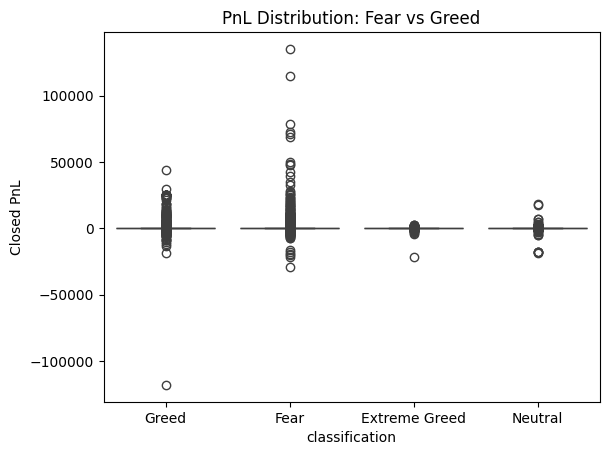

In [64]:
#Chart 1 — PnL comparison
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    data=df,
    x='classification',
    y='Closed PnL'
)
plt.title("PnL Distribution: Fear vs Greed")
plt.show()

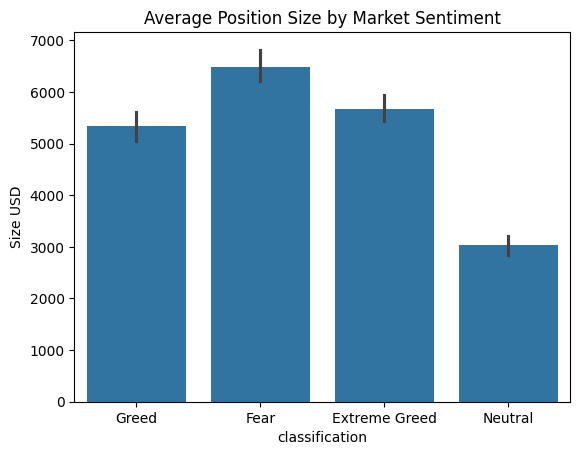

In [66]:
#Chart 2 — Position size by sentiment
sns.barplot(
    data=df,
    x='classification',
    y='Size USD',
    estimator='mean'
)
plt.title("Average Position Size by Market Sentiment")
plt.show()

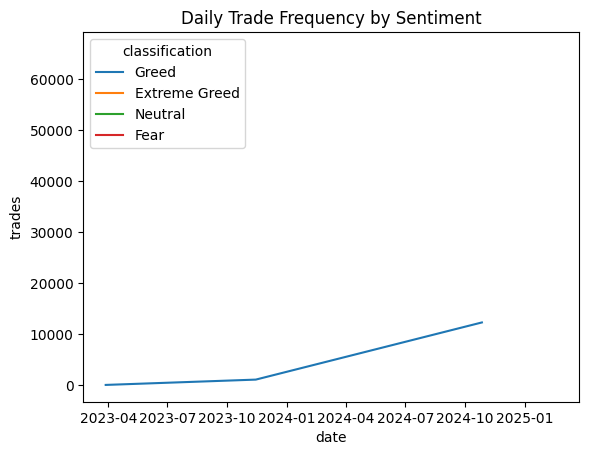

In [67]:
#Chart 3 — Trade frequency
trade_freq = df.groupby(['date', 'classification']).size().reset_index(name='trades')

sns.lineplot(
    data=trade_freq,
    x='date',
    y='trades',
    hue='classification'
)
plt.title("Daily Trade Frequency by Sentiment")
plt.show()